# Load Dataset

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('Banking.csv')
df.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income   
0  10000001                 7,000        < 1 year       Rent        68000.0  \
1  10000002                30,000         4 years   Mortgage            NaN   
2  10000003                24,725         7 years   Mortgage        75566.4   
3  10000004                16,000        < 1 year        NaN        56160.0   
4  10000005                17,000         8 years        Own        96000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income   
0              not verified                 car           18.37  \
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts   
0                   0                      NaN                     9  \
1                   0                     17.0                    12   
2                   0                      NaN                    12   
3                   3                      NaN                    16   
4                   1                      NaN                    19   

   Total_Accounts  Gender  Interest_Rate  
0              14  Female              1  
1              24  Female              3  
2              16    Male              3  
3              22    Male              3  
4              30  Female              1

# Data Analysis


Loan_ID: Unique identifier for each loan.

Loan_Amount_Requested: The amount of money requested by the customer for the loan.

Length_Employed: The duration of the customer's employment, measured in years.

Home_Owner: The home ownership status of the customer, which can be "Own", "Mortgage", "Rent", or "Other".

Annual_Income: The customer's annual income.

Income_Verified: Indicates whether the customer's income has been verified or not, which can be "Verified" or "Not Verified".

Purpose_Of_Loan: The purpose of the loan, such as "Car", "Credit Card", "debt_consolidation", or "Other".

Debt_To_Income: The customer's debt-to-income ratio.

Inquiries_Last_6Mo: The number of credit inquiries made by the customer in the last 6 months.

Months_Since_Deliquency: The number of months since the customer's last delinquency.

Number_Open_Accounts: The current number of open accounts for the customer.

Total_Accounts: The total number of accounts held by the customer.

Gender: The gender of the customer, which can be "Male" or "Female".

Interest_Rate: The interest rate applied to the loan, categorized as "1", "2", or "3".

In [3]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Debt_To_Income'}>],
       [<AxesSubplot:title={'center':'Inquiries_Last_6Mo'}>,
        <AxesSubplot:title={'center':'Months_Since_Deliquency'}>,
        <AxesSubplot:title={'center':'Number_Open_Accounts'}>],
       [<AxesSubplot:title={'center':'Total_Accounts'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>, <AxesSubplot:>]],
      dtype=object)

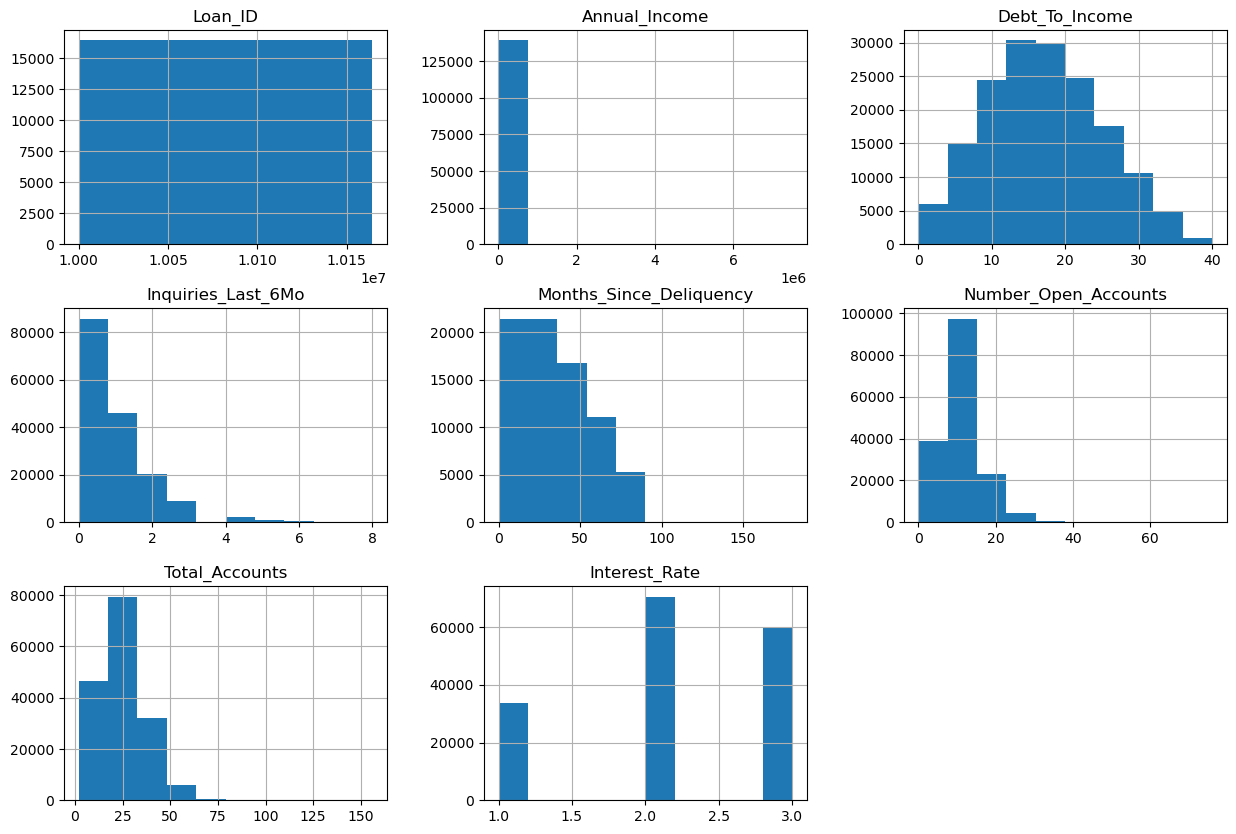

In [5]:
 %matplotlib inline
df.hist(figsize = (15,10))

In [6]:
df['Interest_Rate'].value_counts()

Interest_Rate
2    70580
3    59923
1    33806
Name: count, dtype: int64

<AxesSubplot:>

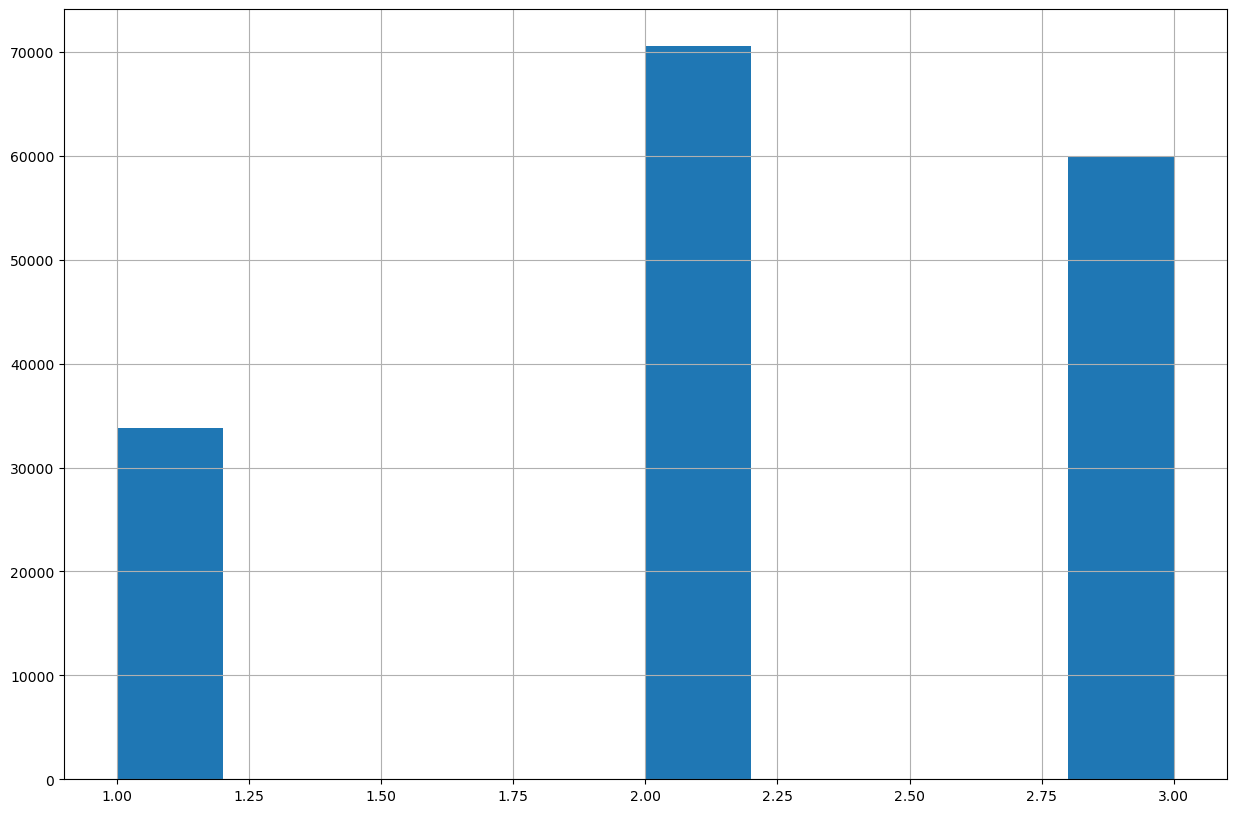

In [7]:

df['Interest_Rate'].hist(figsize = (15,10))

In [8]:
df['Annual_Income'].unique()

array([68000. ,     nan, 75566.4, ..., 51024. , 28721.4, 24864. ])

<AxesSubplot:>

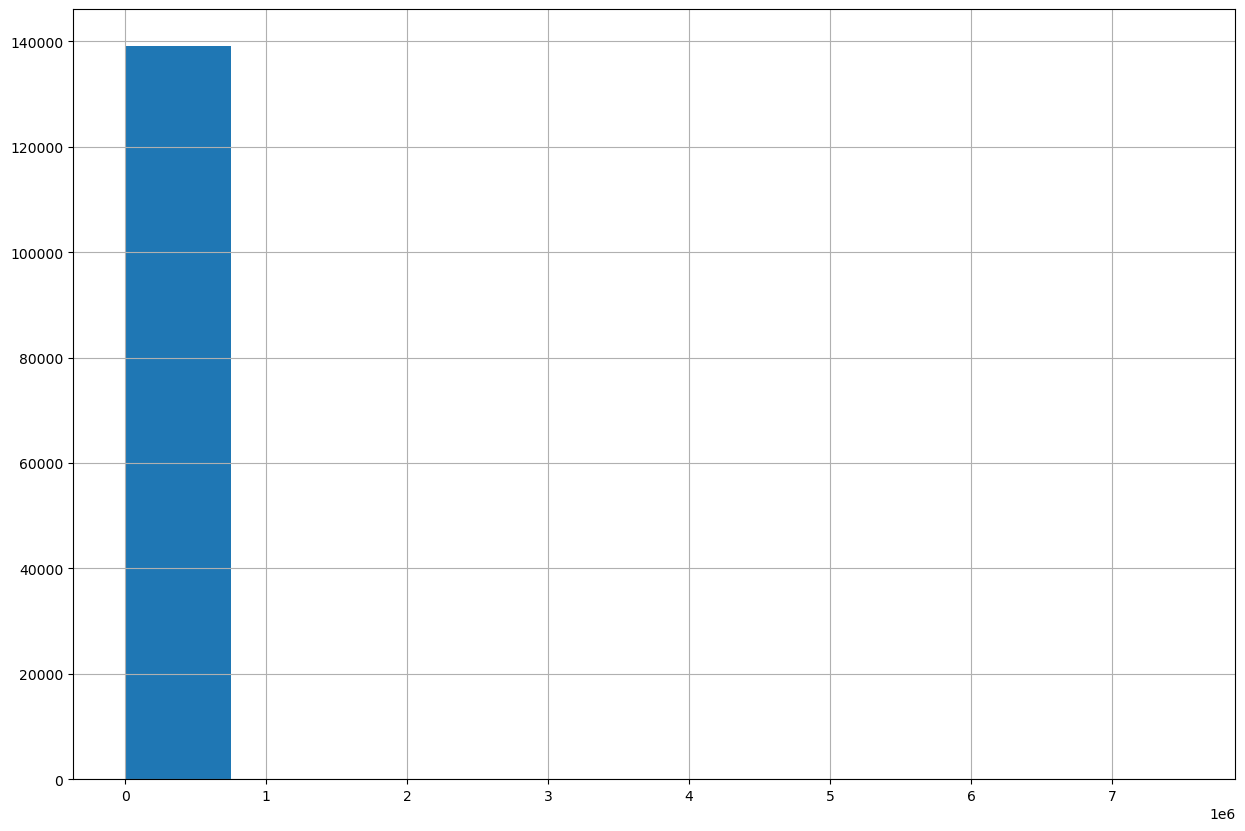

In [9]:
df['Annual_Income'].hist(figsize = (15,10))

In [10]:
df['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

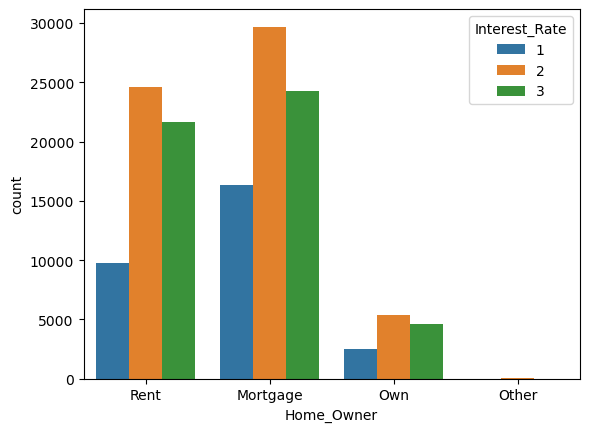

In [11]:
sns.countplot(x = 'Home_Owner',hue = 'Interest_Rate', data = df)

<AxesSubplot:ylabel='count'>

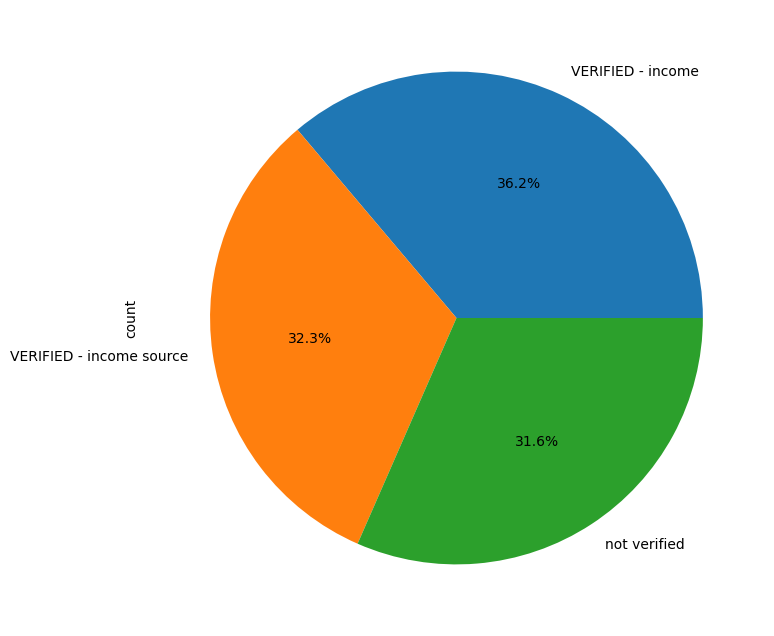

In [12]:
plt.figure(figsize = (8,8))
df['Income_Verified'].value_counts().plot.pie(autopct='%1.1f%%')

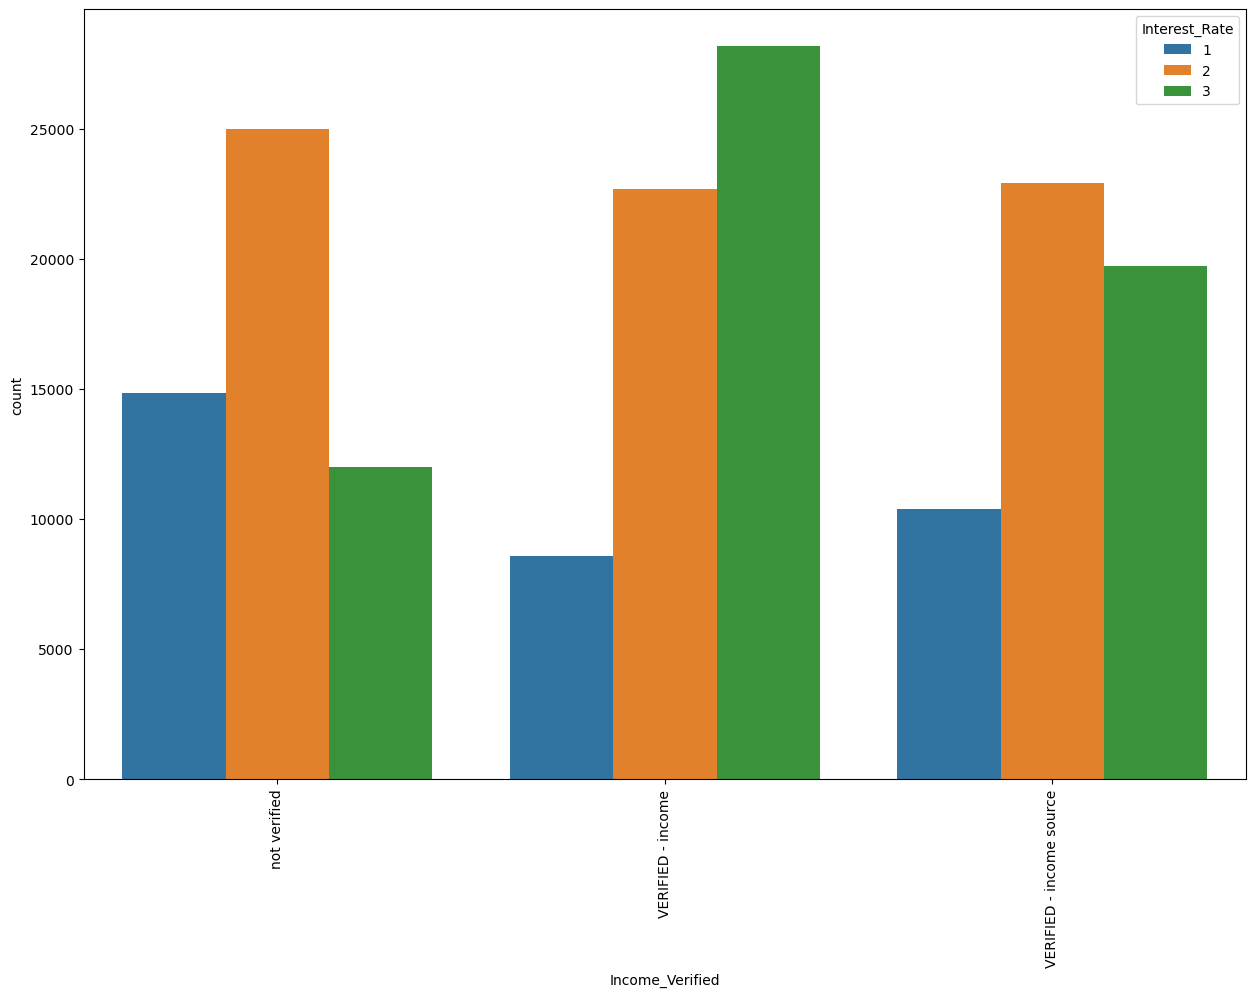

In [13]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['Income_Verified'], hue = df['Interest_Rate'])
plt.xticks(rotation = 90)
plt.show()

In [14]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

<AxesSubplot:>

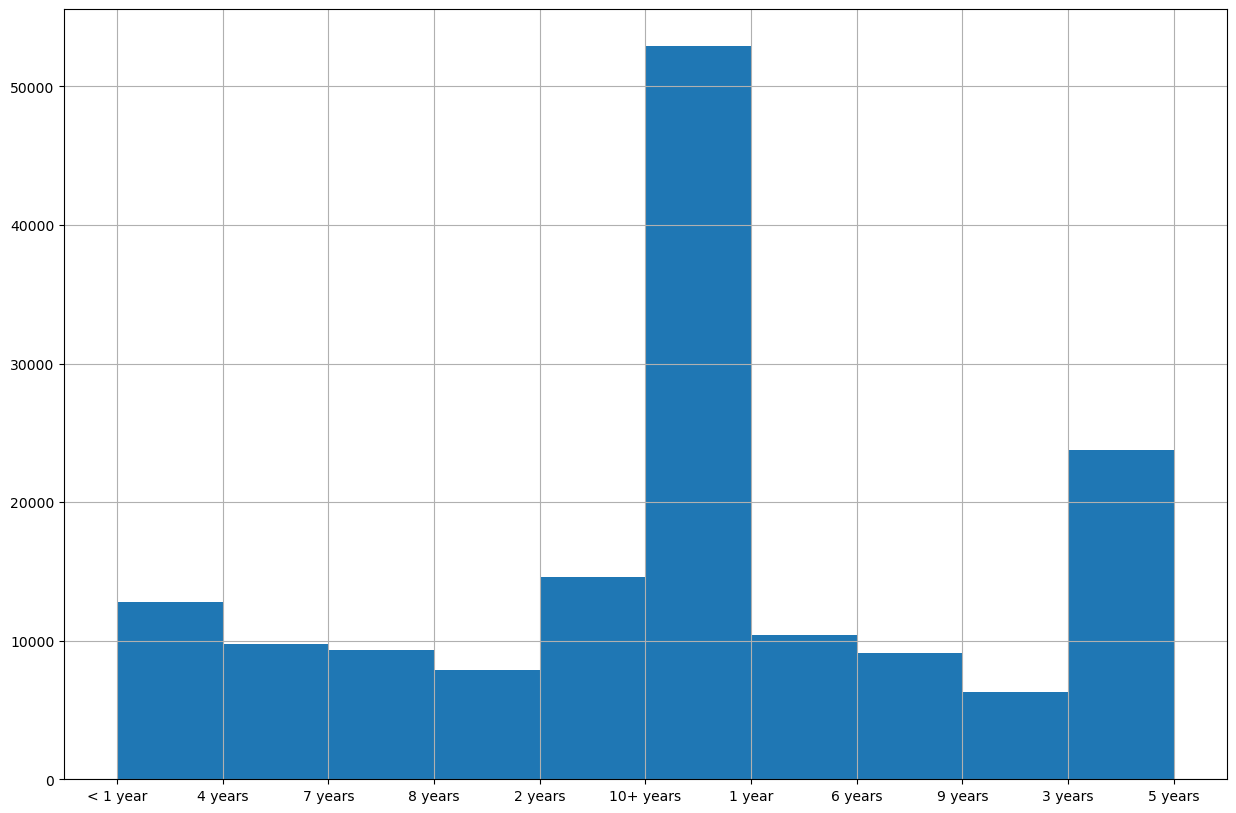

In [15]:
df['Length_Employed'].hist(figsize = (15,10))

<AxesSubplot:>

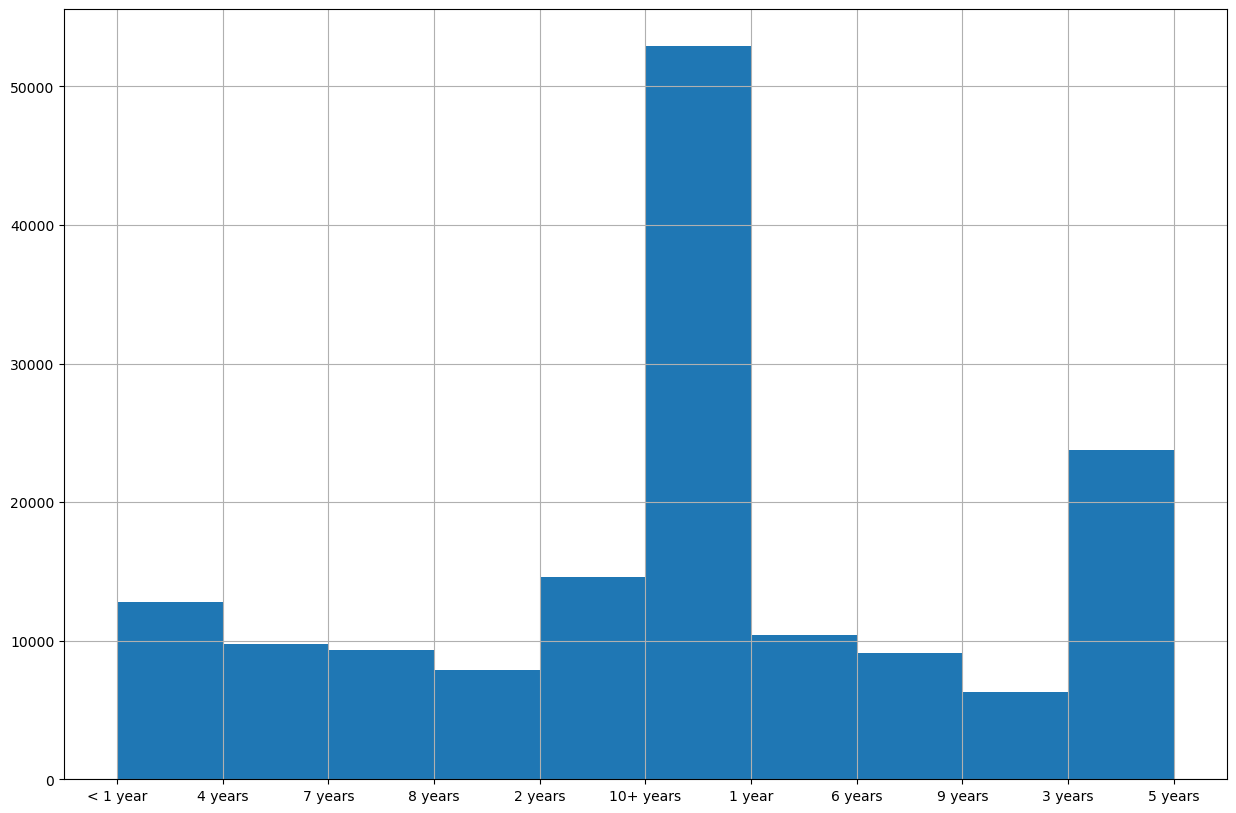

In [16]:
df['Length_Employed'].hist(figsize = (15,10))

# Data Preprocessing

In [17]:
def preprocessing_data(df):
    df['Length_Employed'].fillna(df['Length_Employed'].mode()[0], inplace=True)
    df['Home_Owner'].fillna(df['Home_Owner'].mode()[0], inplace=True)
    df['Annual_Income'].fillna(df['Annual_Income'].mean(), inplace=True)
    df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean(), inplace=True)
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df.drop('Loan_ID', axis=1, inplace=True)
    
    return None
preprocessing_data(df)

<AxesSubplot:xlabel='Debt_To_Income'>

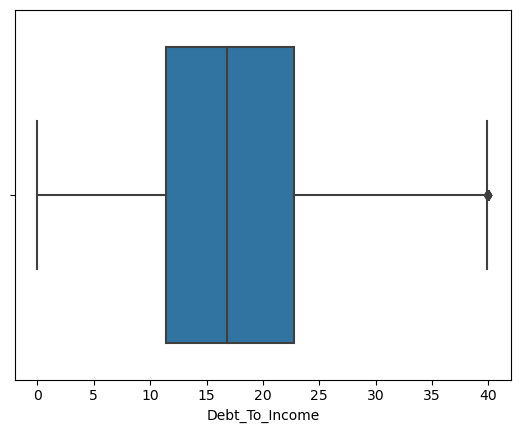

In [18]:
sns.boxplot(x=df['Debt_To_Income'])

<AxesSubplot:xlabel='Annual_Income'>

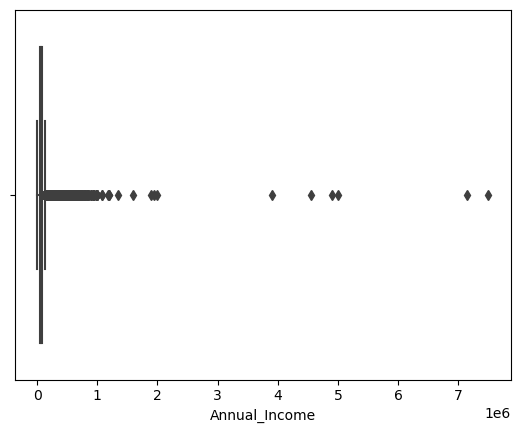

In [19]:
sns.boxplot(x=df['Annual_Income'])

In [20]:
index = df[df['Annual_Income'] >= 15e4].index
df.drop(index, inplace = True)
m = df['Annual_Income'].mean()
df['Annual_Income'].replace(index, m, inplace = True)

<AxesSubplot:xlabel='Inquiries_Last_6Mo'>

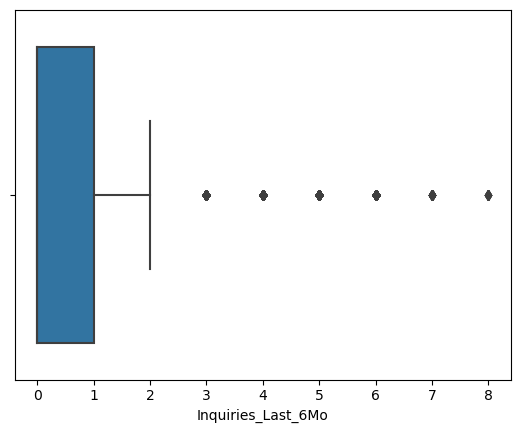

In [21]:
sns.boxplot(x=df['Inquiries_Last_6Mo'])

In [22]:
index = df[df['Inquiries_Last_6Mo'] >= 3].index
df.drop(index, inplace = True)
m = df['Inquiries_Last_6Mo'].mean()
df['Inquiries_Last_6Mo'].replace(index, m, inplace = True)

<AxesSubplot:xlabel='Months_Since_Deliquency'>

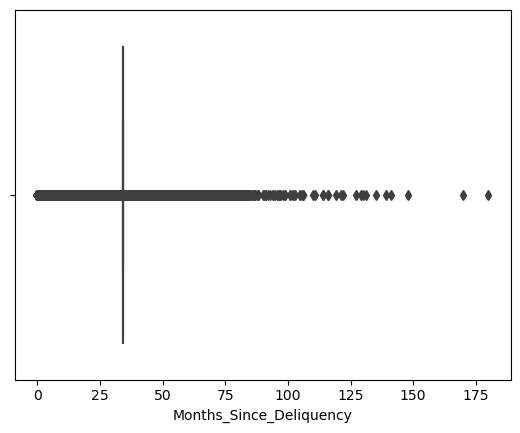

In [23]:
sns.boxplot(x = df['Months_Since_Deliquency'])

In [24]:
index = df[df['Months_Since_Deliquency'] >= 100].index
df.drop(index, inplace = True)
m = df['Months_Since_Deliquency'].mean()
df['Months_Since_Deliquency'].replace(index, m, inplace = True)

<AxesSubplot:xlabel='Number_Open_Accounts'>

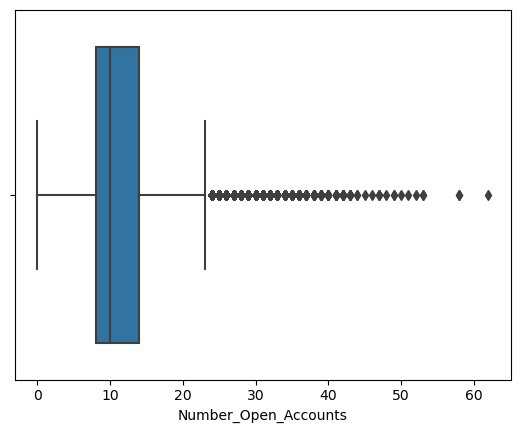

In [25]:
sns.boxplot(x=df['Number_Open_Accounts'])

In [26]:
index = df[df['Number_Open_Accounts'] >= 20].index
df.drop(index, inplace = True)
m = df['Number_Open_Accounts'].mean()
df['Number_Open_Accounts'].replace(index, m, inplace = True)

<AxesSubplot:xlabel='Total_Accounts'>

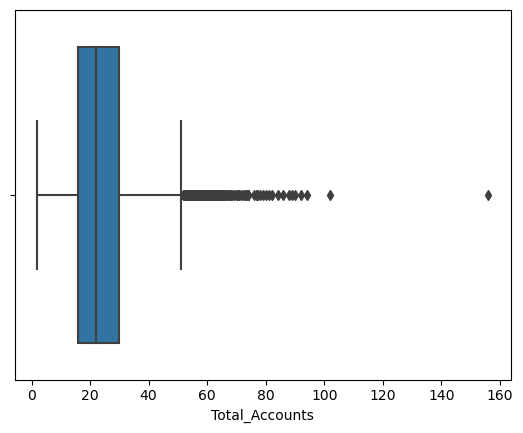

In [27]:
sns.boxplot(x=df['Total_Accounts'])

In [28]:
index = df[df['Total_Accounts'] >= 50].index
df.drop(index, inplace = True)
m = df['Total_Accounts'].mean()
df['Total_Accounts'].replace(index, m, inplace = True)

# Feature Engineering 

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_cols = [col for col in df.columns if df[col].dtypes=="O"] 
for col in cat_cols:
    df.loc[:, col] = encoder.fit_transform(df[col])

<AxesSubplot:>

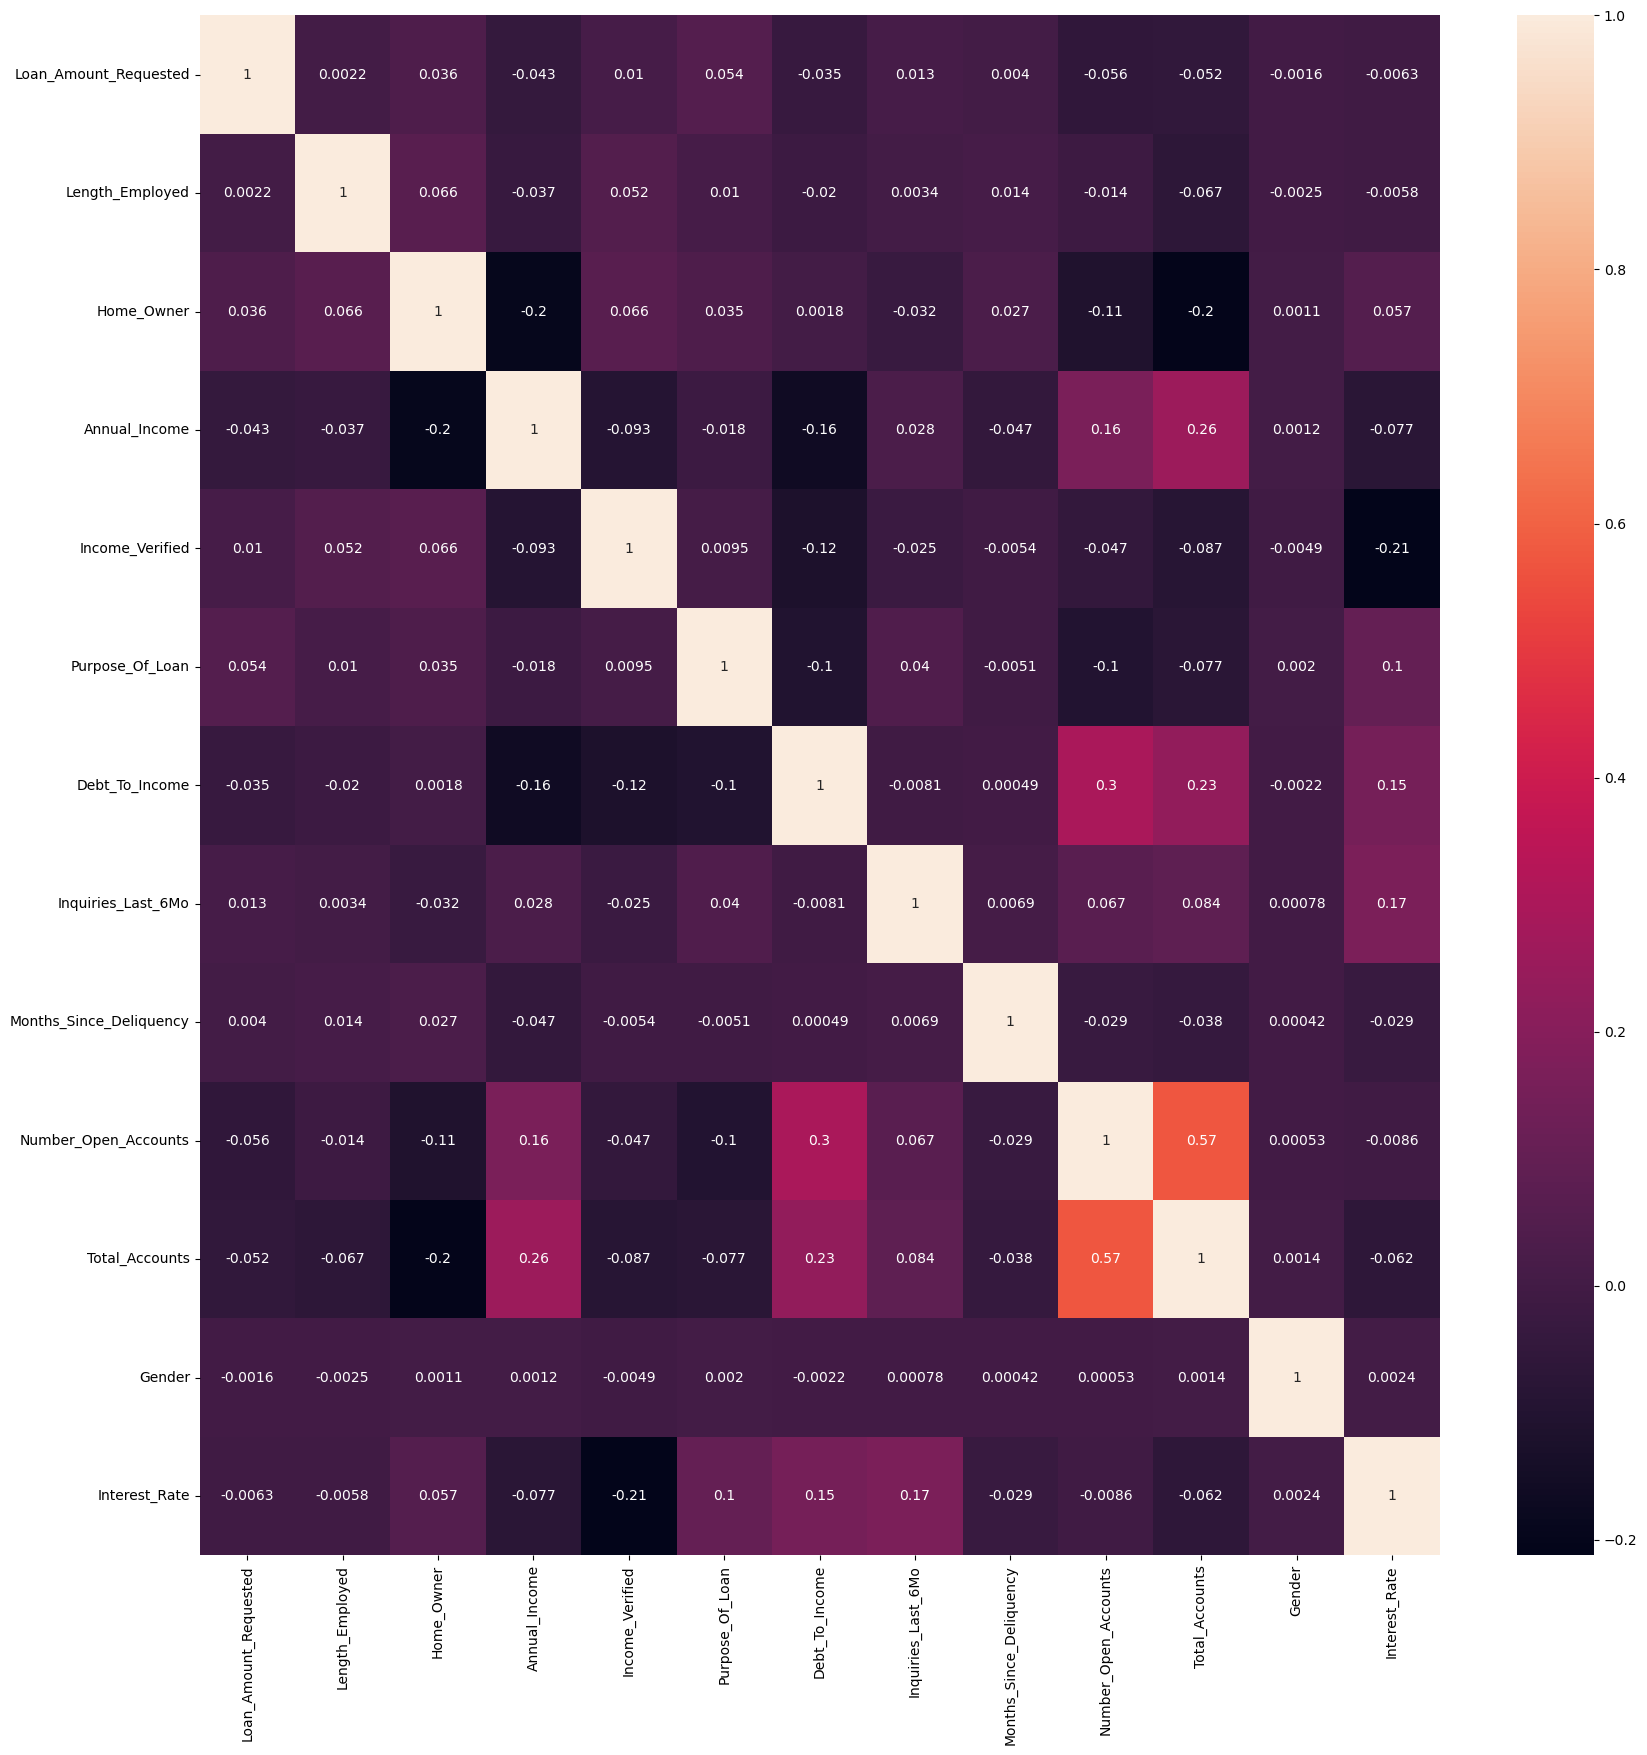

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True) # Show heatmap after normalized data

In [31]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove('Interest_Rate')
    
    X = df[feature_names].values
    y = df['Interest_Rate'].values
    return X, y

X, y = prepare_X_y(df)

# Model Part

In [32]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [33]:
RANDOM_STATE = 26
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X_sc, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [36]:
from sklearn.ensemble import RandomForestClassifier
    
def build_RandomForestClassifier(X, y):
    rf = RandomForestClassifier(max_depth=15, n_estimators=181, random_state=1)
    rf.fit(trainX, trainY)
    return rf

rfc_model = build_RandomForestClassifier(trainX, trainY)
preY = rfc_model.predict(testX)

In [37]:
print(classification_report(testY, preY))

              precision    recall  f1-score   support

           1       0.54      0.18      0.27      8384
           2       0.50      0.68      0.57     17904
           3       0.56      0.53      0.54     14113

    accuracy                           0.52     40401
   macro avg       0.53      0.46      0.46     40401
weighted avg       0.53      0.52      0.50     40401



In [48]:
from sklearn.tree import DecisionTreeClassifier

def build_DecisionTree(X,Y):
    dt = DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best',random_state = 25)
    dt.fit(X,Y)
    return dt

DT_model = build_DecisionTree(trainX, trainY)
y_pred = DT_model.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.21      0.29      8384
           2       0.50      0.62      0.55     17904
           3       0.53      0.54      0.54     14113

    accuracy                           0.51     40401
   macro avg       0.50      0.46      0.46     40401
weighted avg       0.50      0.51      0.49     40401



In [49]:
from sklearn.neighbors import KNeighborsClassifier

def build_KNeighborsClassifier(X,Y):
    km = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=5,p=1)
    km.fit(X,Y)
    return km

KN_model = build_KNeighborsClassifier(trainX, trainY)
y_pred = KN_model.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           1       0.32      0.35      0.34      8384
           2       0.47      0.52      0.50     17904
           3       0.50      0.40      0.45     14113

    accuracy                           0.45     40401
   macro avg       0.43      0.43      0.43     40401
weighted avg       0.45      0.45      0.45     40401



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def build_model_LogisticRegression(X, y):
    
    model =LogisticRegression(penalty = 'l2', solver = 'liblinear', random_state = 42)
    model.fit(X, y)
    
    return model

LG_model = build_model_LogisticRegression(trainX, trainY)
preY = LG_model.predict(testX)
print(classification_report(testY, preY))

              precision    recall  f1-score   support

           1       0.52      0.06      0.10      8384
           2       0.48      0.71      0.57     17904
           3       0.52      0.46      0.49     14113

    accuracy                           0.49     40401
   macro avg       0.50      0.41      0.39     40401
weighted avg       0.50      0.49      0.45     40401



In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def build_model_CNB(X, y):

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline(steps=[("pca", PCA()), ("scaler", MinMaxScaler()), ("nb",CategoricalNB())])
    # Todo: fit your model with X, y
    #var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "pca__n_components": [1, 2, 3, 4, 5, 6, 7, 8],
        "scaler__feature_range": [(-1, 1), (0, 1)],
        #'nb__var_smoothing': var_smoothing_values
        "nb__alpha": np.logspace(-4, -9, num=100)
        }
    model = GridSearchCV(pipe, param_grid, n_jobs=4)
    model.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)
    return model
                              
def build_model_NB(X, y):
    # GaussianNB Model
    gnb = GaussianNB()
    gnb.fit(X, y)
    # Bernoulli Model
    bnb = BernoulliNB()
    bnb.fit(X, y)
    # Categorical Model
    #model = build_model_CNB(X, y)
    
    return gnb, bnb

gnb, bnb=build_model_NB(trainX, trainY)

preY_1 = gnb.predict(testX)
print("GaussianNB", classification_report(testY, preY_1), '\n')

preY_2 = bnb.predict(testX)
print("BernoulliNB", classification_report(testY, preY_2))

GaussianNB               precision    recall  f1-score   support

           1       0.45      0.15      0.23      8384
           2       0.48      0.74      0.58     17904
           3       0.53      0.37      0.43     14113

    accuracy                           0.49     40401
   macro avg       0.49      0.42      0.41     40401
weighted avg       0.49      0.49      0.45     40401
 

BernoulliNB               precision    recall  f1-score   support

           1       0.43      0.06      0.10      8384
           2       0.47      0.76      0.58     17904
           3       0.50      0.36      0.42     14113

    accuracy                           0.48     40401
   macro avg       0.47      0.39      0.37     40401
weighted avg       0.47      0.48      0.43     40401



In [52]:
from sklearn.neural_network import MLPClassifier

def build_MLPCLassifier(X, y):
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam',learning_rate= 'adaptive')
    mlp.fit(trainX, trainY)
    return mlp

mlp_model = build_MLPCLassifier(trainX, trainY)
preY = mlp_model.predict(testX)
print(f"Report MLP \n {classification_report(testY, preY)}")

C:\Users\doian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Report MLP 
               precision    recall  f1-score   support

           1       0.43      0.29      0.34      8384
           2       0.49      0.58      0.53     17904
           3       0.52      0.52      0.52     14113

    accuracy                           0.50     40401
   macro avg       0.48      0.46      0.47     40401
weighted avg       0.49      0.50      0.49     40401



In [53]:
from catboost import CatBoostClassifier

def build_CBClassifier(X, y):
    cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=5)
    cb.fit(X, y)
    return cb

cb_model = build_CBClassifier(trainX, trainY)
preY = cb_model.predict(testX)
print(classification_report(testY, preY))

0:	learn: 1.0817658	total: 218ms	remaining: 3m 37s
1:	learn: 1.0686927	total: 267ms	remaining: 2m 13s
2:	learn: 1.0565599	total: 314ms	remaining: 1m 44s
3:	learn: 1.0466568	total: 360ms	remaining: 1m 29s
4:	learn: 1.0378040	total: 406ms	remaining: 1m 20s
5:	learn: 1.0303428	total: 465ms	remaining: 1m 16s
6:	learn: 1.0237450	total: 508ms	remaining: 1m 12s
7:	learn: 1.0180229	total: 553ms	remaining: 1m 8s
8:	learn: 1.0127842	total: 599ms	remaining: 1m 5s
9:	learn: 1.0084837	total: 641ms	remaining: 1m 3s
10:	learn: 1.0043145	total: 693ms	remaining: 1m 2s
11:	learn: 1.0003106	total: 744ms	remaining: 1m 1s
12:	learn: 0.9971178	total: 785ms	remaining: 59.6s
13:	learn: 0.9944798	total: 832ms	remaining: 58.6s
14:	learn: 0.9918168	total: 876ms	remaining: 57.5s
15:	learn: 0.9892784	total: 931ms	remaining: 57.2s
16:	learn: 0.9871190	total: 986ms	remaining: 57s
17:	learn: 0.9852024	total: 1.04s	remaining: 56.9s
18:	learn: 0.9831180	total: 1.08s	remaining: 56s
19:	learn: 0.9812395	total: 1.13s	rema

161:	learn: 0.9301635	total: 9.15s	remaining: 47.3s
162:	learn: 0.9300956	total: 9.19s	remaining: 47.2s
163:	learn: 0.9299697	total: 9.24s	remaining: 47.1s
164:	learn: 0.9298112	total: 9.29s	remaining: 47s
165:	learn: 0.9296982	total: 9.34s	remaining: 46.9s
166:	learn: 0.9296093	total: 9.4s	remaining: 46.9s
167:	learn: 0.9294305	total: 9.46s	remaining: 46.8s
168:	learn: 0.9293441	total: 9.51s	remaining: 46.7s
169:	learn: 0.9292435	total: 9.56s	remaining: 46.7s
170:	learn: 0.9291400	total: 9.61s	remaining: 46.6s
171:	learn: 0.9290328	total: 9.66s	remaining: 46.5s
172:	learn: 0.9289581	total: 9.7s	remaining: 46.4s
173:	learn: 0.9288861	total: 9.75s	remaining: 46.3s
174:	learn: 0.9288049	total: 9.8s	remaining: 46.2s
175:	learn: 0.9287181	total: 9.86s	remaining: 46.1s
176:	learn: 0.9285933	total: 9.9s	remaining: 46.1s
177:	learn: 0.9285193	total: 9.95s	remaining: 46s
178:	learn: 0.9284109	total: 10s	remaining: 45.9s
179:	learn: 0.9283114	total: 10s	remaining: 45.8s
180:	learn: 0.9281745	to

323:	learn: 0.9176388	total: 16.4s	remaining: 34.2s
324:	learn: 0.9175833	total: 16.4s	remaining: 34.1s
325:	learn: 0.9175004	total: 16.5s	remaining: 34.1s
326:	learn: 0.9174621	total: 16.5s	remaining: 34s
327:	learn: 0.9173820	total: 16.6s	remaining: 34s
328:	learn: 0.9173350	total: 16.6s	remaining: 33.9s
329:	learn: 0.9172667	total: 16.7s	remaining: 33.8s
330:	learn: 0.9172237	total: 16.7s	remaining: 33.8s
331:	learn: 0.9171634	total: 16.7s	remaining: 33.7s
332:	learn: 0.9171132	total: 16.8s	remaining: 33.6s
333:	learn: 0.9170650	total: 16.8s	remaining: 33.5s
334:	learn: 0.9170054	total: 16.9s	remaining: 33.5s
335:	learn: 0.9169507	total: 16.9s	remaining: 33.4s
336:	learn: 0.9168988	total: 16.9s	remaining: 33.3s
337:	learn: 0.9168453	total: 17s	remaining: 33.3s
338:	learn: 0.9168004	total: 17s	remaining: 33.2s
339:	learn: 0.9167278	total: 17.1s	remaining: 33.1s
340:	learn: 0.9166783	total: 17.1s	remaining: 33.1s
341:	learn: 0.9166603	total: 17.2s	remaining: 33s
342:	learn: 0.9166042	

482:	learn: 0.9093604	total: 24.2s	remaining: 25.9s
483:	learn: 0.9093109	total: 24.3s	remaining: 25.9s
484:	learn: 0.9092801	total: 24.3s	remaining: 25.8s
485:	learn: 0.9092277	total: 24.4s	remaining: 25.8s
486:	learn: 0.9091855	total: 24.4s	remaining: 25.7s
487:	learn: 0.9091266	total: 24.5s	remaining: 25.7s
488:	learn: 0.9090777	total: 24.5s	remaining: 25.6s
489:	learn: 0.9090541	total: 24.6s	remaining: 25.6s
490:	learn: 0.9089960	total: 24.6s	remaining: 25.5s
491:	learn: 0.9089613	total: 24.7s	remaining: 25.5s
492:	learn: 0.9089352	total: 24.7s	remaining: 25.4s
493:	learn: 0.9088784	total: 24.8s	remaining: 25.4s
494:	learn: 0.9088317	total: 24.8s	remaining: 25.3s
495:	learn: 0.9087890	total: 24.9s	remaining: 25.3s
496:	learn: 0.9087530	total: 24.9s	remaining: 25.2s
497:	learn: 0.9086914	total: 25s	remaining: 25.2s
498:	learn: 0.9086311	total: 25s	remaining: 25.1s
499:	learn: 0.9085912	total: 25.1s	remaining: 25.1s
500:	learn: 0.9085238	total: 25.1s	remaining: 25s
501:	learn: 0.9084

641:	learn: 0.9025727	total: 31.8s	remaining: 17.7s
642:	learn: 0.9025311	total: 31.8s	remaining: 17.7s
643:	learn: 0.9024773	total: 31.8s	remaining: 17.6s
644:	learn: 0.9024494	total: 31.9s	remaining: 17.5s
645:	learn: 0.9024138	total: 31.9s	remaining: 17.5s
646:	learn: 0.9023936	total: 32s	remaining: 17.4s
647:	learn: 0.9023639	total: 32s	remaining: 17.4s
648:	learn: 0.9023339	total: 32.1s	remaining: 17.3s
649:	learn: 0.9023139	total: 32.1s	remaining: 17.3s
650:	learn: 0.9022718	total: 32.1s	remaining: 17.2s
651:	learn: 0.9022278	total: 32.2s	remaining: 17.2s
652:	learn: 0.9021988	total: 32.2s	remaining: 17.1s
653:	learn: 0.9021542	total: 32.3s	remaining: 17.1s
654:	learn: 0.9021296	total: 32.3s	remaining: 17s
655:	learn: 0.9020880	total: 32.4s	remaining: 17s
656:	learn: 0.9020561	total: 32.4s	remaining: 16.9s
657:	learn: 0.9020382	total: 32.5s	remaining: 16.9s
658:	learn: 0.9020056	total: 32.5s	remaining: 16.8s
659:	learn: 0.9019586	total: 32.5s	remaining: 16.8s
660:	learn: 0.901920

804:	learn: 0.8965009	total: 39.5s	remaining: 9.58s
805:	learn: 0.8964546	total: 39.6s	remaining: 9.53s
806:	learn: 0.8964242	total: 39.7s	remaining: 9.48s
807:	learn: 0.8963760	total: 39.7s	remaining: 9.44s
808:	learn: 0.8963459	total: 39.8s	remaining: 9.39s
809:	learn: 0.8963151	total: 39.8s	remaining: 9.35s
810:	learn: 0.8962857	total: 39.9s	remaining: 9.3s
811:	learn: 0.8962626	total: 40s	remaining: 9.25s
812:	learn: 0.8962210	total: 40s	remaining: 9.21s
813:	learn: 0.8961872	total: 40.1s	remaining: 9.16s
814:	learn: 0.8961494	total: 40.1s	remaining: 9.11s
815:	learn: 0.8961049	total: 40.2s	remaining: 9.06s
816:	learn: 0.8960738	total: 40.2s	remaining: 9.01s
817:	learn: 0.8960434	total: 40.3s	remaining: 8.96s
818:	learn: 0.8959977	total: 40.3s	remaining: 8.91s
819:	learn: 0.8959667	total: 40.4s	remaining: 8.87s
820:	learn: 0.8959444	total: 40.4s	remaining: 8.82s
821:	learn: 0.8959037	total: 40.5s	remaining: 8.77s
822:	learn: 0.8958510	total: 40.5s	remaining: 8.72s
823:	learn: 0.895

968:	learn: 0.8905161	total: 47.3s	remaining: 1.51s
969:	learn: 0.8904754	total: 47.4s	remaining: 1.47s
970:	learn: 0.8904503	total: 47.4s	remaining: 1.42s
971:	learn: 0.8904062	total: 47.5s	remaining: 1.37s
972:	learn: 0.8903661	total: 47.5s	remaining: 1.32s
973:	learn: 0.8903429	total: 47.6s	remaining: 1.27s
974:	learn: 0.8903210	total: 47.6s	remaining: 1.22s
975:	learn: 0.8902945	total: 47.6s	remaining: 1.17s
976:	learn: 0.8902550	total: 47.7s	remaining: 1.12s
977:	learn: 0.8902235	total: 47.7s	remaining: 1.07s
978:	learn: 0.8901789	total: 47.8s	remaining: 1.02s
979:	learn: 0.8901419	total: 47.8s	remaining: 976ms
980:	learn: 0.8901076	total: 47.9s	remaining: 927ms
981:	learn: 0.8900710	total: 47.9s	remaining: 878ms
982:	learn: 0.8900165	total: 48s	remaining: 829ms
983:	learn: 0.8899818	total: 48s	remaining: 780ms
984:	learn: 0.8899566	total: 48s	remaining: 732ms
985:	learn: 0.8899346	total: 48.1s	remaining: 683ms
986:	learn: 0.8899036	total: 48.1s	remaining: 634ms
987:	learn: 0.8898

# Discussion and Conclusion

In [ ]:
def Discussion_and_Conclusion():
    return"""
        Mục đích của bài phân tích là phân loại tỉ lệ cho vay của khách hàng, do đó em sử dụng các model phân loại để phân tích
        Dựa vào acccuracy để so sánh giữa các model thì kết quả cho thấy MLPClassifier và RandomForestClassifier cho ra kết quả tốt nhất.
        Dựa vào kết quả phân tích cho thấy tỉ lệ cho vay cao đa phần ở mức 2,3
        Mô hình MLP xử lý tốt các mô hình phi tuyến,hỗ trợ tinh chỉnh tham số.Nhưng vẫn có hạn chế là đòi hỏi nhiều tài nguyên và thời gian train model khá lâu.
        Khi yêu cầu học đại diện tổng quát: MLP có khả năng học các đặc trưng phức tạp và tạo ra các đại diện tổng quát cho dữ liệu. Điều này có lợi khi bài toán đòi hỏi mô hình phải hiểu được sự phức tạp của dữ liệu và đưa ra dự đoán chính xác
    """